### Keras
Keras是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端。Keras 为支持快速实验而生，能够把你的idea迅速转换为结果

简易和快速的原型设计（keras具有高度模块化，极简，和可扩充特性）

支持CNN和RNN，或二者的结合

无缝CPU和GPU切换


In [2]:
import h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### 首先还是需要加载数据集

In [39]:
def load_data():
    #读取本地文件，用h5py读取
    train_dataset = h5py.File('/Users/zwx/ZWXX/CS231/data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('/Users/zwx/ZWXX/CS231/data_set/test_catvnoncat.h5')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 
    
    classes = np.array(test_dataset["list_classes"][:]) 
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [40]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

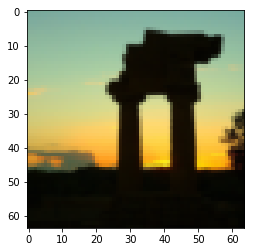

In [41]:
index = 40
plt.imshow(train_x_orig[index])#展示第index张图片

In [42]:
#把特征转化成二维的,并且需要标准化，这里需要注意的是y的形状应该是209，1，所以需要改变形状
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255
train_y = train_y.reshape(1,-1).T
test_y = test_y.reshape(1,-1).T
print("train_x 的形状是：",train_x.shape)
print("test_x的形状是：",test_x.shape)
print("train_y的形状是：",train_y.shape)
print("test_y的形状是：",test_y.shape)

train_x 的形状是： (209, 12288)
test_x的形状是： (50, 12288)
train_y的形状是： (209, 1)
test_y的形状是： (50, 1)


### 下面建立keras中相对简单的模型 Sequential


#### 1 初始化

In [43]:
model = Sequential()

#### 2 加入全连接层 layer

In [15]:
#units:表示当前的layer的神经元节点
#activaton:表示选取的激活函数
#input_shape:表示输入的数组维度，这里是特征数
#kernel_initializer:初始化的方式

model.add(Dense(units=1,activation='sigmoid',input_shape=(12288,),kernel_initializer='random_normal'))

#### 3 定义优化器和损失函数   （梯度下降或者梯度上升的过程）

In [22]:
SGD = keras.optimizers.sgd(lr=0.01) #lr为学习率
model.compile(loss = keras.losses.binary_crossentropy,optimizer=SGD,metrics=['accuracy'])

#### 4 训练模型

In [23]:
model.fit(train_x,train_y,batch_size=64,epochs=1000,verbose=0) #verbose=1时打印每一个结果，0时不打印

#### 5 计算正确率

In [24]:
loss, acc = model.evaluate(test_x, test_y, batch_size=50)
print('测试样本的正确率为:',acc)

50/50 [==============================] - 0s 892us/step
测试样本的正确率为: 0.3400000035762787


In [25]:
loss, acc = model.evaluate(train_x, train_y, batch_size=50)
print('训练样本的正确率为:',acc)

209/209 [==============================] - 0s 62us/step
训练样本的正确率为: 0.6555024028965161


### 通过tensorflow建立模型

In [27]:
import tensorflow as tf

#### 1 首先还是初始化w和b

#### 2 初始化变量使用tf.Variable
tf.Variable(tf.random_normal(shape=[1,n],seed=1))

#### 3 占位符 tf.placeholder
tf.placeholder(tf.float32,shape=[None,n])

tf.placeholder(dtype,shape=None,name=None)

dtype：数据类型。常用的是tf.float32,tf.float64等数值类型

shape：数据形状。默认是None，就是一维值，也可以是多维（比如[2,3], [None, 3]表示列是3，行不定）

name：名称


shape中一般只要放入特征值的大小,TF会自动将输入的X塞进去.

#### 4 矩阵相乘
tf.matmul()

#### 5 损失函数的计算 
可以使用 tf.nn.sigmoid_cross_entropy_with_logits(logits=Z,labels=y)

tf.nn.sigmoid_cross_entropy_with_logits(logits=Z,labels=y)

注意这里logits项会直接帮你计算sigmoid,所以传入的并不是sigmoid作用之后的值,而是线性值.

#### 6 梯度下降选择的优化器
tf.train.GradientDescentOptimizer（ ）

minimize(cost):使用优化器后目的就是最小化minimize,也就是相当于开始参数更新.

#### 7 计算两者是否相等
tf.equal:计算两者是否相等,再使用tf.cast转换类型,最后求平均

#### 当初始化完毕了之后就可以开始运行计算图了tf.Session()

sess.run(init)
...

tf.Session()
一般这一步都是定死的

### 所以TF的整体结构就是:
(1) 定义变量和占位符

(2) 编写需要的代码(构建网络架构)

(3) 初始化所有代码

(4) 运行计算图

(5) 得到参数更新结果

### 注意形状

In [55]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1) / 255
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1) / 255
train_y = train_y.reshape(1,-1)
test_y= test_y.reshape(1,-1)
print("train_x 的形状是：",train_x.shape)
print("test_x的形状是：",test_x.shape)
print("train_y的形状是：",train_y.shape)
print("test_y的形状是：",test_y.shape)

train_x 的形状是： (209, 12288)
test_x的形状是： (50, 12288)
train_y的形状是： (1, 209)
test_y的形状是： (1, 50)


In [56]:
def initial_parameters(n):
    
    #tf.random_normal:从正态分布输出随机值,seed为随机数种子,shape用于初始化变量定义形状.
    W = tf.Variable(tf.random_normal(shape=[1,n],seed=1))
    #tf.zeros 建立一个零矩阵
    b = tf.Variable(tf.zeros(shape=[1,1]))
    
    return W,b

In [57]:
def LR_tensorflow(train_x,train_y,test_x,test_y,alpha,Iter):
    '''
    变量说明
    train_x:训练样本的特征
    train_y:训练样本的标签
    test_x:测试样本的特征
    test_y:测试样本的标签
    alpha:学习率
    Iter:迭代次数
    '''
    m,n = train_x.shape
    ## 建立placeholder
    X = tf.placeholder(tf.float32,shape=[None,n]) # None表示不确定当前的形状
    y = tf.placeholder(tf.float32,shape=[1,None])
    W,b = initial_parameters(n)
    Z = tf.matmul(W,tf.transpose(X)) + b  #tf.transpose表示矩阵的转至的计算
    
    #计算损失函数
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z,labels = y))
    
    #梯度下降
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    #计算正确率
    correct_ = tf.equal(tf.round(tf.sigmoid(Z)),y)
    
    accuracy = tf.reduce_mean(tf.cast(correct_,tf.float32))  #tf.reduce_mean求平均
    
    #最后初始化变量
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        
        sess.run(init) #需要初始化

        for iter_ in range(Iter):
            
            # return value equal list size.
            # need feed dict,how many placeholder how many value.
            _,c = sess.run([optimizer,cost],feed_dict={X:train_x,y:train_y})
           
            if iter_ % 100 == 0:
                
                print('after iter {},loss {}'.format(iter_,c))
        
        # 计算正确率
        correct_rate_test = accuracy.eval({X:test_x,y:test_y })
        correct_rate_train = accuracy.eval({X:train_x,y:train_y})
        print("测试样本的正确率为 ",correct_rate_test)
        print("训练样本的正确率为 ",correct_rate_train)

In [54]:
LR_tensorflow(train_x,train_y,test_x,test_y,0.1,1100)

after iter 0,loss 7.985492706298828
after iter 100,loss 3.4039981365203857
after iter 200,loss 14.464579582214355
after iter 300,loss 1.3415228128433228
after iter 400,loss 9.29128646850586
after iter 500,loss 4.443009376525879
after iter 600,loss 1.3032474517822266
after iter 700,loss 0.31220778822898865
after iter 800,loss 0.1305931806564331
after iter 900,loss 0.22720423340797424
after iter 1000,loss 0.043595489114522934
The test set correct is  0.6
The train set correct is  0.9952153


In [ ]:
#### python中的with as 用法
#这个语法是用来代替传统的try...finally语法的。